# Análisis Exploratorio de Datos (EDA) - Stroke Dataset.

Este notebook contiene un análisis exploratorio paso a paso del dataset de predicción de ictus (stroke), siguiendo una estructura clara, visual y comentada, para posteriormente crear un modelo que prediga si una persona puede tener ictus o no.

El dataset que vamos a usar es [este.](https://www.kaggle.com/datasets/jillanisofttech/brain-stroke-dataset/data)


## Cargamos del dataset y mostramos información básica sobre el mismo

In [152]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv("stroke_dataset.csv")

# Mostrar las primeras filas
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [153]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


Vemos que hay diferentes tipos de datos, por lo que más adelante tendremos que normalizarlos.

In [154]:
# Estadísticas descriptivas de variables numéricas
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [155]:
# Verificar cuantos vaores únicos hay en cada columna
for col in df.columns:
    print(f"Columna: {col}")
    print(f"Valores únicos: {df[col].nunique()}")
    print("-------")

Columna: gender
Valores únicos: 2
-------
Columna: age
Valores únicos: 104
-------
Columna: hypertension
Valores únicos: 2
-------
Columna: heart_disease
Valores únicos: 2
-------
Columna: ever_married
Valores únicos: 2
-------
Columna: work_type
Valores únicos: 4
-------
Columna: Residence_type
Valores únicos: 2
-------
Columna: avg_glucose_level
Valores únicos: 3895
-------
Columna: bmi
Valores únicos: 342
-------
Columna: smoking_status
Valores únicos: 4
-------
Columna: stroke
Valores únicos: 2
-------


In [156]:
# Verificar cuales son los valores únicos sin tener en cuenta las columnas numéricas
discarded_columns = ["age", "avg_glucose_level", "bmi"]

for col in df.columns:
    if col not in discarded_columns:
        print(f"Columna: {col}")
        print(f"Valores únicos: {df[col].unique()}")
        print("-------")

Columna: gender
Valores únicos: ['Male' 'Female']
-------
Columna: hypertension
Valores únicos: [0 1]
-------
Columna: heart_disease
Valores únicos: [1 0]
-------
Columna: ever_married
Valores únicos: ['Yes' 'No']
-------
Columna: work_type
Valores únicos: ['Private' 'Self-employed' 'Govt_job' 'children']
-------
Columna: Residence_type
Valores únicos: ['Urban' 'Rural']
-------
Columna: smoking_status
Valores únicos: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
-------
Columna: stroke
Valores únicos: [1 0]
-------


In [157]:
# Verificar cuantos "Unknown" hay en la columna 'smoking_status'
unknwon_count = (df['smoking_status'] == "Unknown").sum()
print(f"Hay {unknwon_count} filas con 'Unknown' en la columna 'smoking_status'")

Hay 1500 filas con 'Unknown' en la columna 'smoking_status'


In [158]:
# Averiguar cuántas filas tienen "Unknown" en la columna 'smoking_status' y 'stroke' igual a 1
count = len(df[(df["smoking_status"] == "Unknown") & (df["stroke"] == 1)])
print(f"Hay {count} filas con 'Unknown' en 'smoking_status' y positivo en ictus.")

Hay 47 filas con 'Unknown' en 'smoking_status' y positivo en ictus.


In [159]:
# Verificar si hay filas duplicadas
duplicates = df.duplicated()

if duplicates.any():
    print("Hay filas duplicadas en el dataset.")
else:
    print("No hay filas duplicadas en el dataset.")

No hay filas duplicadas en el dataset.


In [160]:
# Verificar si hay al menos un NaN en todo el DataFrame
is_nan = df.isna().any().any()

if is_nan == True:
    print("El dataset contiene al menos un valor NaN.")
else:
    print("No hay valores NaN en el dataset.")

No hay valores NaN en el dataset.


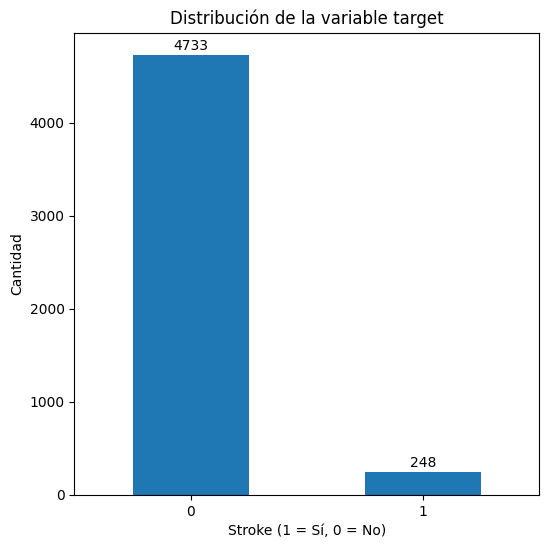

In [161]:
import matplotlib.pyplot as plt

counts = df['stroke'].value_counts().sort_index()

plt.figure(figsize=(6, 6))  # ancho=6, alto=4


ax = counts.plot(kind='bar')
plt.title('Distribución de la variable target')
plt.xlabel('Stroke (1 = Sí, 0 = No)')
plt.ylabel('Cantidad')

plt.xticks(rotation=0)

for i, v in enumerate(counts):
    ax.text(i, v + 50, str(v), ha='center', fontsize=10)

plt.show()

Vemos que el dataset está bastante desbalanceado:

- No Ictus: 4733 (95,02%)

- Ictus: 248 (4,98%)

La gran mayoría de los registros no tuvieron un ACV. Esto es un punto crítico para el modelado, ya que los modelos pueden tender a predecir la clase mayoritaria. Se necesitarán técnicas de manejo de desbalance (oversampling, undersampling, SMOTE, uso de pesos de clase) o métricas de evaluación adecuadas (F1-score, Precision, Recall, AUC-PR).

## Análisis de variables categóricas

Variables categóricas: ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']


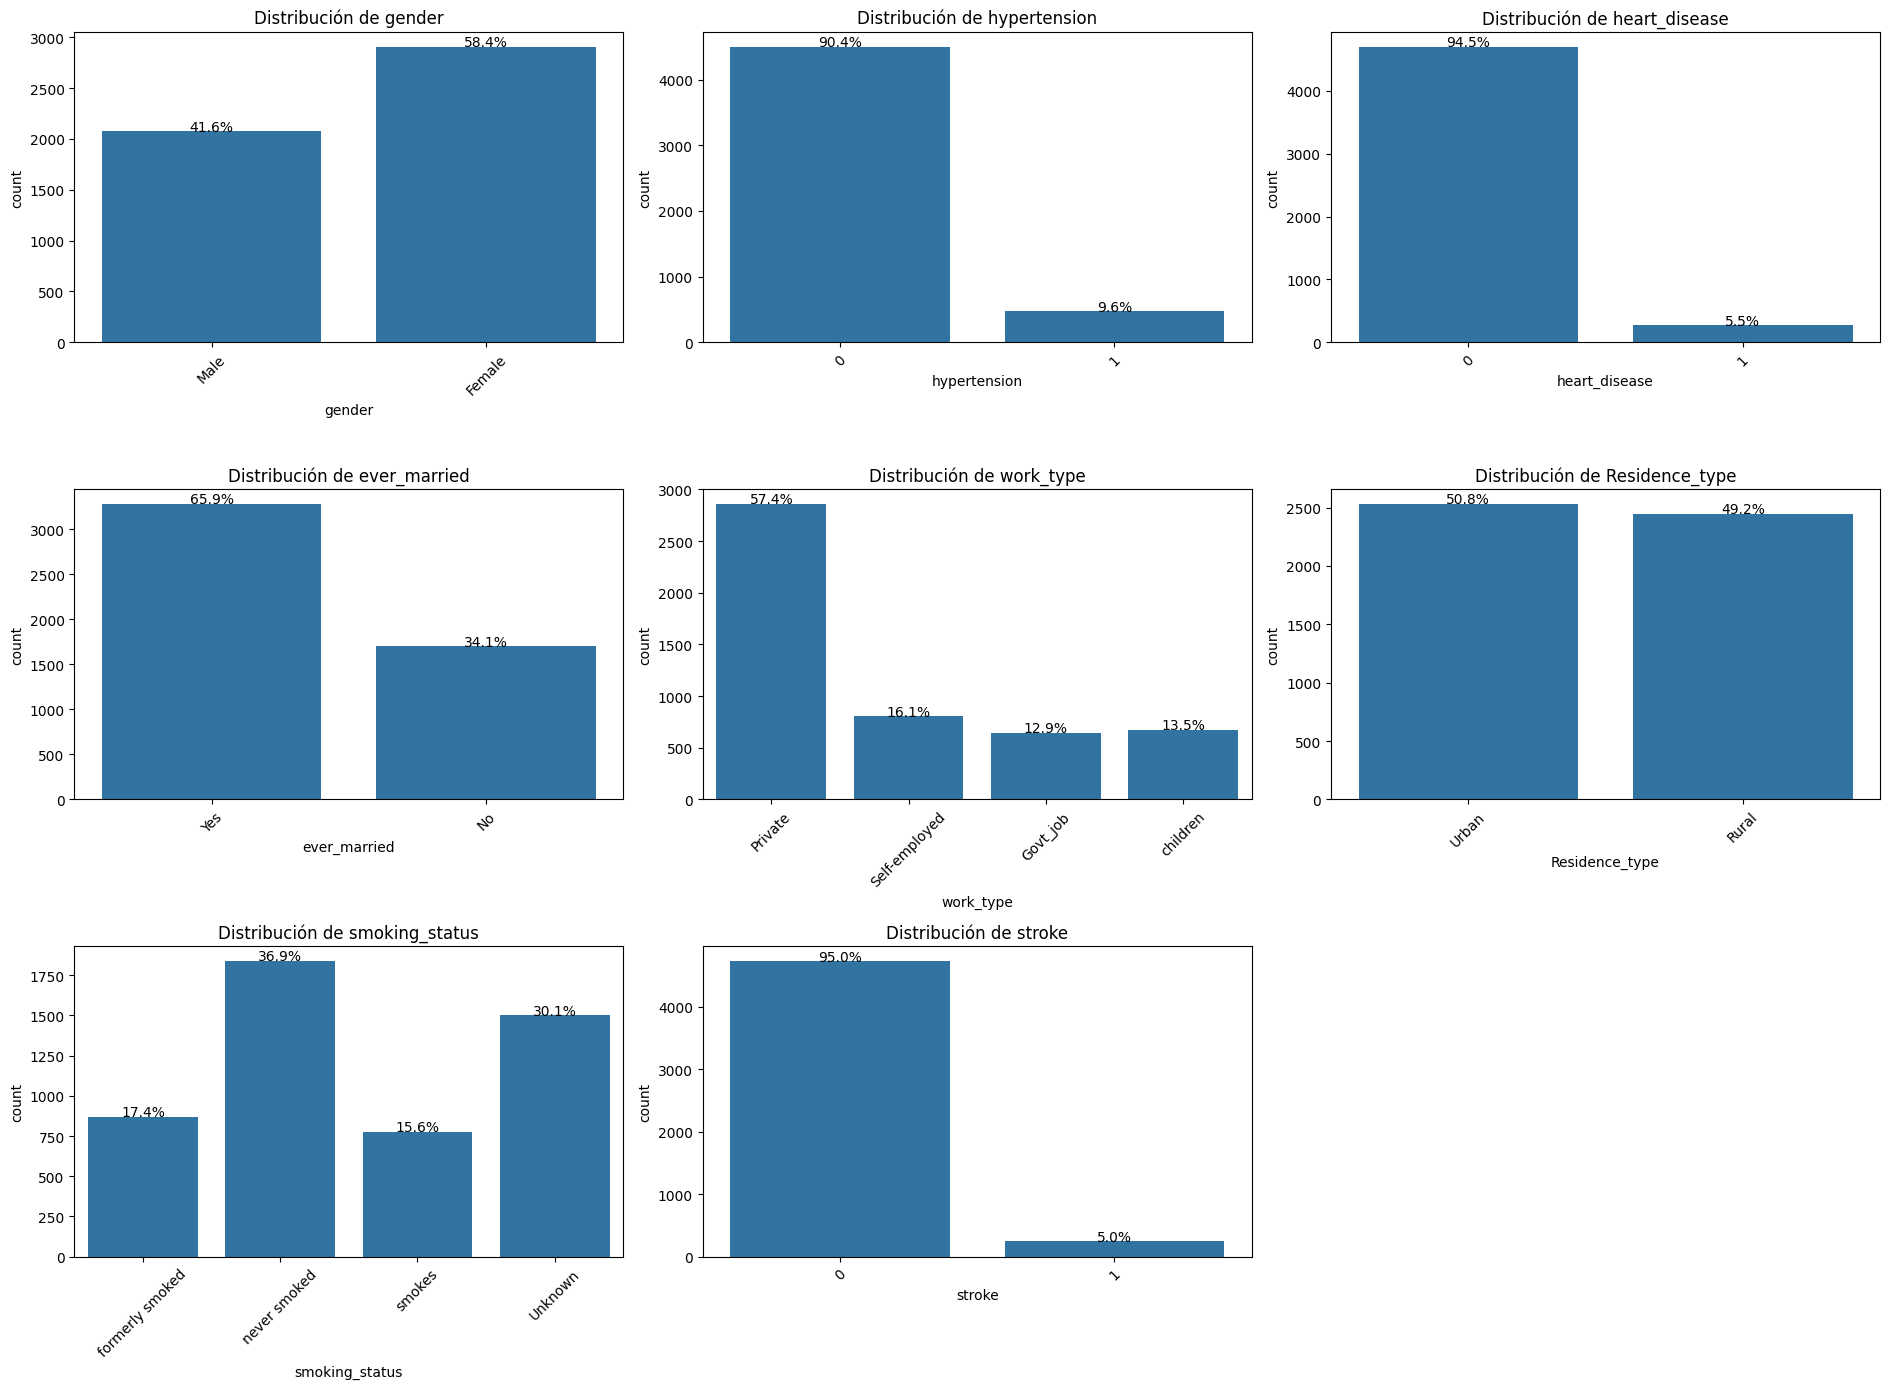

In [162]:
import seaborn as sns

# Identificar variables categóricas
categorical_cols = [col for col in df.columns if df[col].dtype == 'object' or col in ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']]

print('Variables categóricas:', categorical_cols)

# Crear gráficos para cada variable categórica
plt.figure(figsize=(19, 14))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, data=df)
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
    
    # Añadir etiquetas con porcentajes
    total = len(df)
    for p in plt.gca().patches:
        height = p.get_height()
        plt.text(p.get_x() + p.get_width()/2., height + 5, f'{height/total*100:.1f}%', ha='center')

plt.tight_layout()
plt.show()


## Análisis de variables numéricas

Variables numéricas: ['age', 'avg_glucose_level', 'bmi']


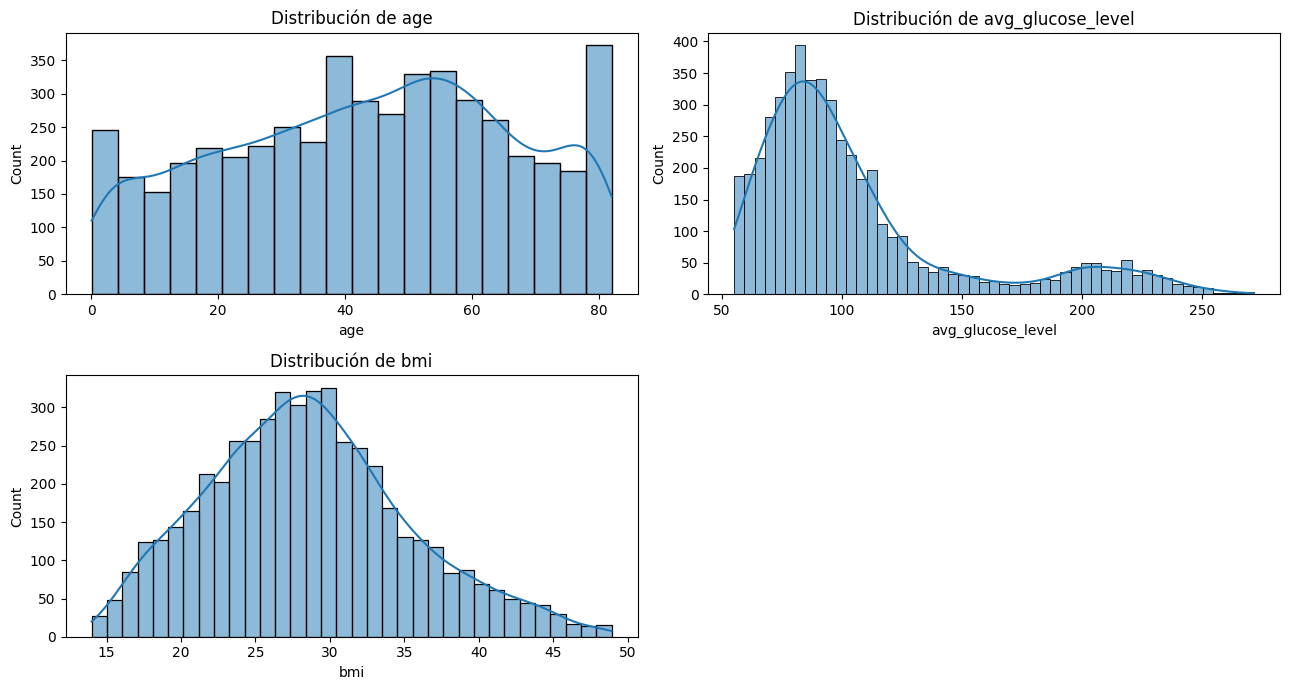

In [163]:
# Identificar variables numéricas
numerical_cols = [col for col in df.columns if df[col].dtype != 'object' and col not in ['hypertension', 'heart_disease', 'stroke']]

print('Variables numéricas:', numerical_cols)

# Crear histogramas para cada variable numérica
plt.figure(figsize=(13, 7))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}')

plt.tight_layout()
plt.show()

## Análisis bivariado con la variable objetivo `stroke`

Exploramos cómo se relacionan las variables explicativas con la variable objetivo `stroke`. Esto nos ayuda a identificar patrones o posibles predictores relevantes para el modelo.

### Comparación de variables numéricas según `stroke`

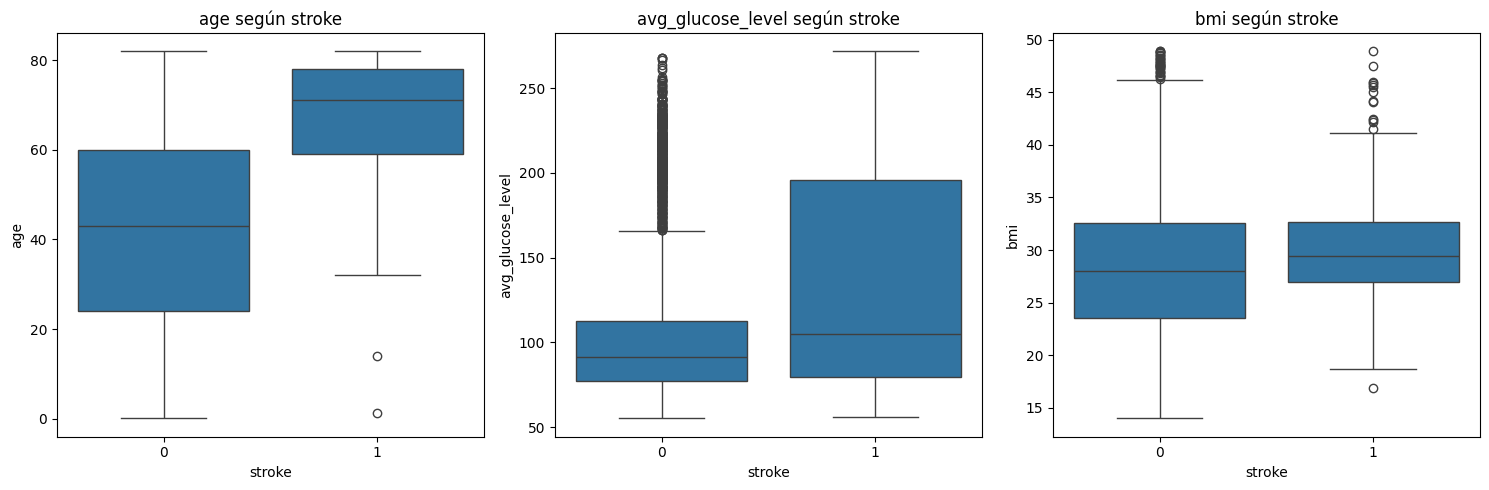

In [164]:
# Verificar la relación entre variables numéricas y la variable target 'stroke'
numeric_cols = ['age', 'avg_glucose_level', 'bmi']

plt.figure(figsize=(15, 5))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df, x='stroke', y=col)
    plt.title(f'{col} según stroke')

plt.tight_layout()
plt.show()


### Distribución de variables categóricas según `stroke`

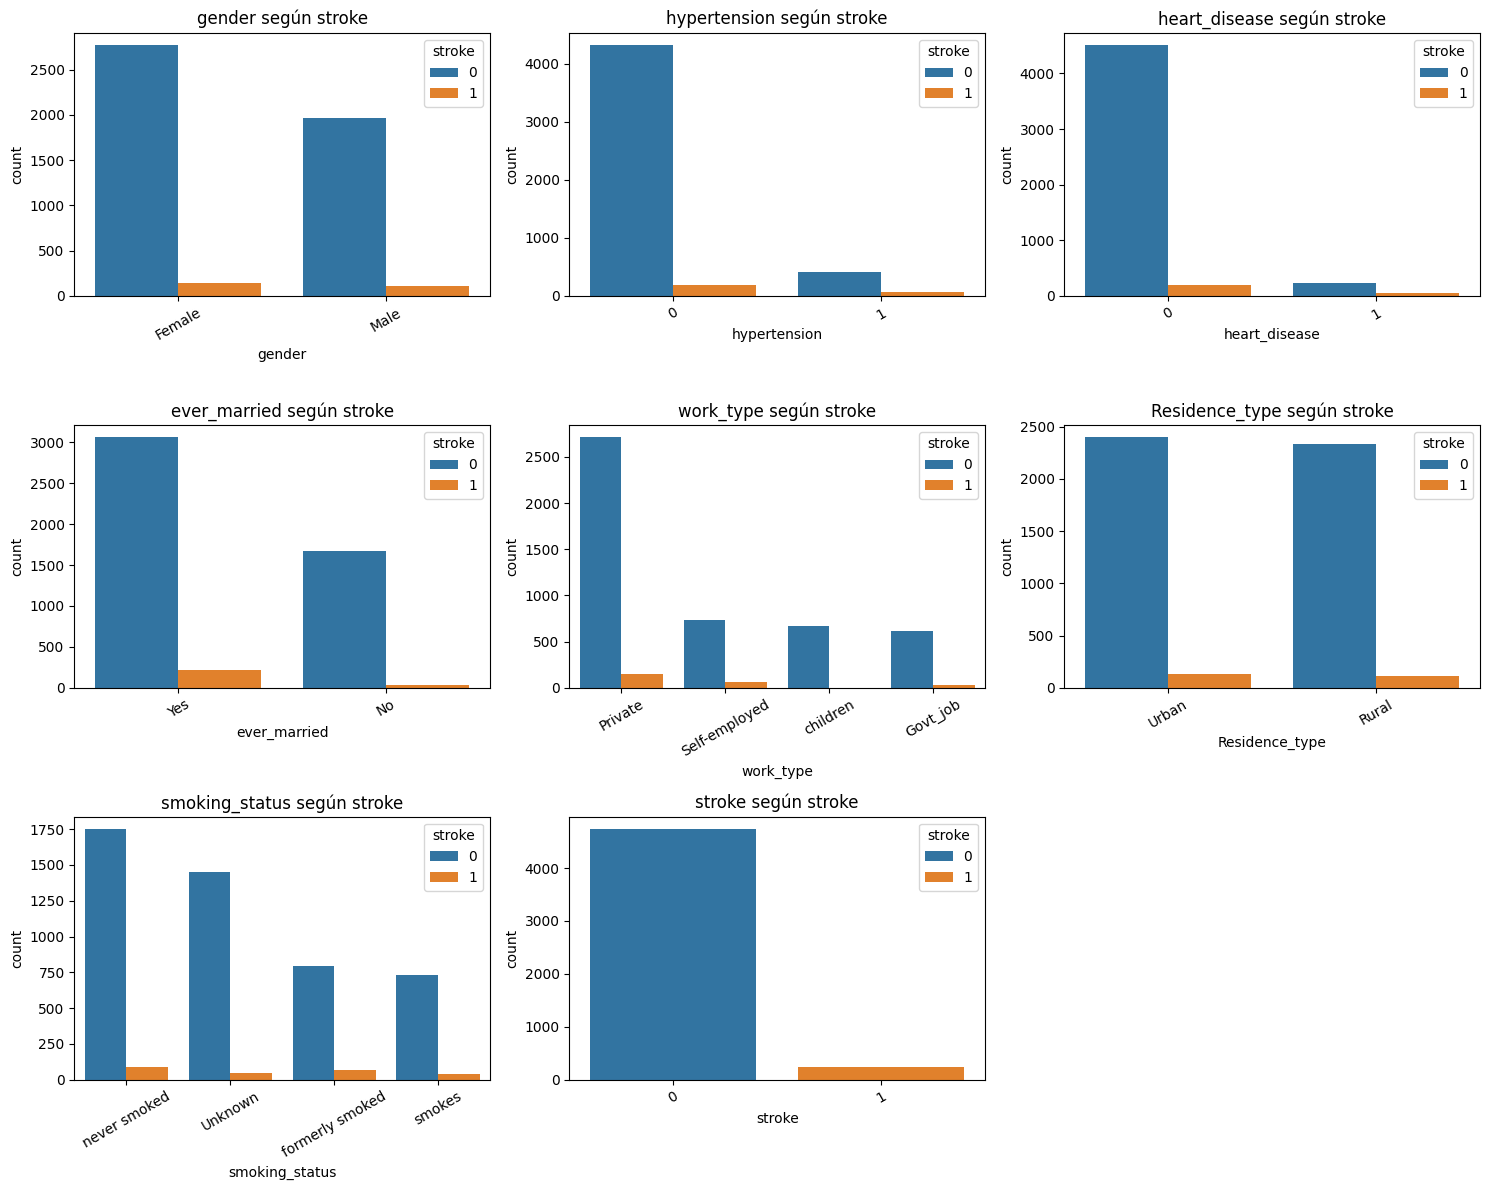

In [165]:
# Verificar la relación entre variables categóricas y la variable target 'stroke'
n = len(categorical_cols)
n_cols = 3  # número de columnas por fila
n_rows = (n + n_cols - 1) // n_cols  # calcula cuántas filas se necesitan

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=df, x=col, hue='stroke', order=df[col].value_counts().index)
    plt.title(f'{col} según stroke')
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

### Matriz de correlación de todas las variables con "stroke"

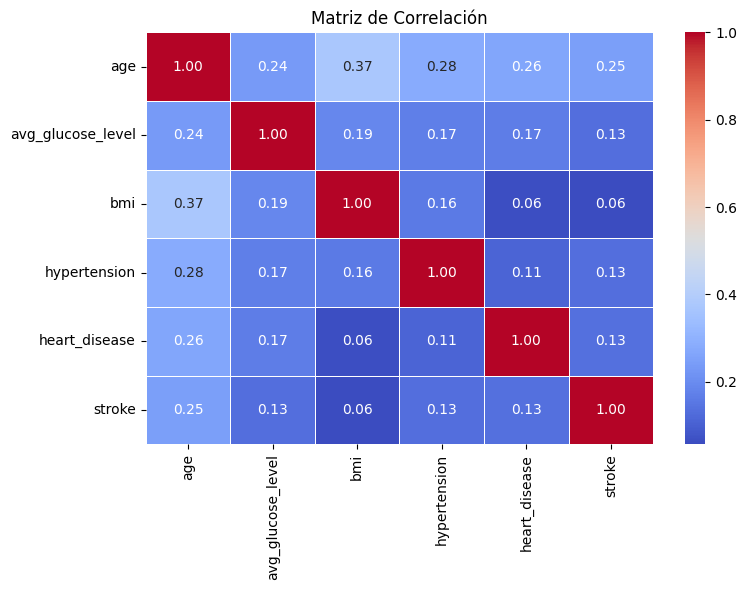

In [166]:
# Crear un dataframe con variables numéricas y binarias
corr_df = df[numerical_cols + ['hypertension', 'heart_disease', 'stroke']]

# Calcular la matriz de correlación
corr_matrix = corr_df.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

### Detección de outliers

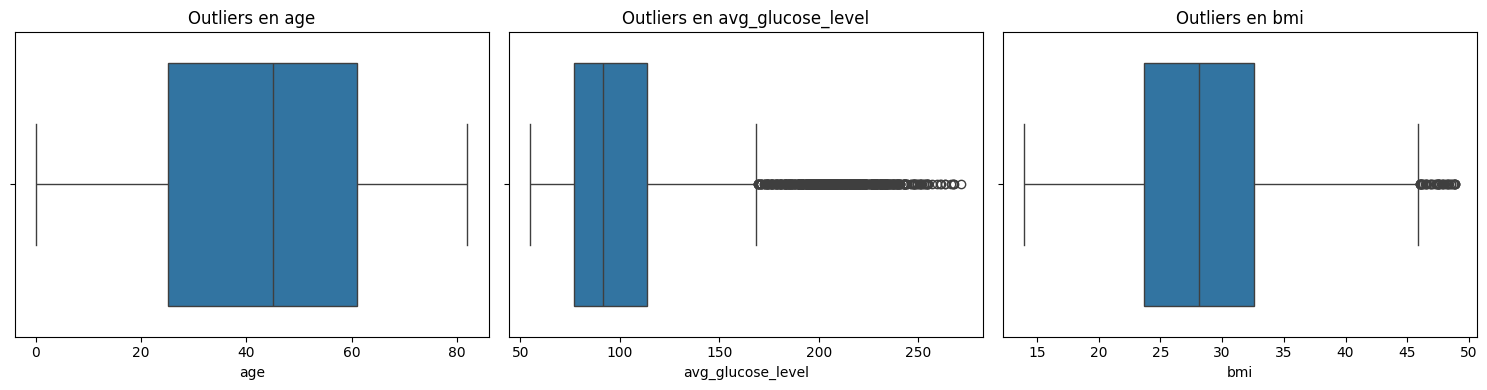

In [167]:
# Detección de outliers en variables numéricas
cols = ['age', 'avg_glucose_level', 'bmi']

plt.figure(figsize=(15, 4))  # Ajusta el tamaño según necesites

for i, col in enumerate(cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Outliers en {col}')

plt.tight_layout()
plt.show()

Vemos que hay bastantes outliers en "avg_glucose_level" y "bmi" pero tras estudiar e investigar estas variables, damos por echo de que son valores reales, aunque un poco fuera de lo común y ligados a una posible enfermedad como puede ser el caso de un "posible ictus".

## Normalización y transformación de los datos

- "gender": convertir de objeto a binario
- "ever_married": convertir de objeto a binario
- "work_type": convertir de objeto a binario
- "Residence_type": convertir de objeto a binario
- "smoking_status": convertir de objeto a binario

In [168]:
# lista de columnas categóricas a convertir
multiclass_columns = ["work_type", "smoking_status"]

# usamos get_dummies para convertir las columnas categóricas en variables dummy
df = pd.get_dummies(df, columns=multiclass_columns)

# aseguramos que los dummies están como enteros (0/1)
dummy_cols = [col for col in df.columns if any(prefix in col for prefix in multiclass_columns)]
df[dummy_cols] = df[dummy_cols].astype(int)

In [169]:
# convertir las columnas binarias a enteros (0/1)
binary_columns = ["gender", "ever_married", "Residence_type"]
mapping_dict = {
    "gender": {"Male": 1, "Female": 0},
    "ever_married": {"Yes": 1, "No": 0},
    "Residence_type": {"Urban": 1, "Rural": 0}
}

for col in binary_columns:
    df[col] = df[col].map(mapping_dict[col])

In [170]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,0,1,0,0
1,1,80.0,0,1,1,0,105.92,32.5,1,0,1,0,0,0,0,1,0
2,0,49.0,0,0,1,1,171.23,34.4,1,0,1,0,0,0,0,0,1
3,0,79.0,1,0,1,0,174.12,24.0,1,0,0,1,0,0,0,1,0
4,1,81.0,0,0,1,1,186.21,29.0,1,0,1,0,0,0,1,0,0


In [172]:
# guardamos el dataset limpio
df.to_csv("cleaned_dataset.csv", index=False)

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          4981 non-null   int64  
 1   age                             4981 non-null   float64
 2   hypertension                    4981 non-null   int64  
 3   heart_disease                   4981 non-null   int64  
 4   ever_married                    4981 non-null   int64  
 5   Residence_type                  4981 non-null   int64  
 6   avg_glucose_level               4981 non-null   float64
 7   bmi                             4981 non-null   float64
 8   stroke                          4981 non-null   int64  
 9   work_type_Govt_job              4981 non-null   int64  
 10  work_type_Private               4981 non-null   int64  
 11  work_type_Self-employed         4981 non-null   int64  
 12  work_type_children              49

### Matriz de correlación de todas las variables con "stroke" tras la transformación de datos

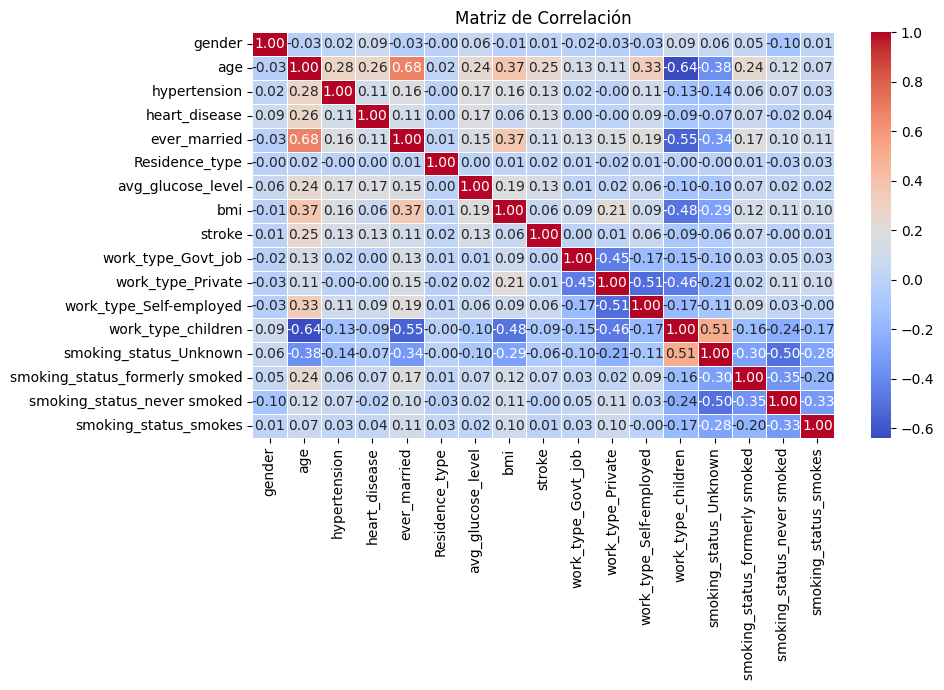

In [174]:
# Calcular la matriz de correlación
corr_matrix = df.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

## Conclusiones del Análisis Exploratorio

A partir de las gráficas generadas en el análisis, se pueden extraer las siguientes conclusiones relevantes:

1. **Distribuciones de Variables Numéricas**:
   - La variable `age` muestra una distribución sesgada hacia personas mayores, lo cual es coherente con la naturaleza del problema (riesgo de ictus).
   - `avg_glucose_level` y `bmi` presentan distribuciones con colas largas, indicando posibles valores extremos o atípicos.

2. **Relación de Variables Numéricas con la Variable Objetivo (`stroke`)**:
   - Las personas que han sufrido un ictus tienden a tener edades mayores, niveles más altos de glucosa promedio y valores de `bmi` algo mayores.
   - Estos patrones sugieren que estas variables pueden tener un poder predictivo importante en un modelo.

3. **Relación de Variables Categóricas con `stroke`**:
   - Se observan diferencias significativas en la frecuencia de ictus según categorías como `hypertension`, `heart_disease` y `work_type`, lo que indica que estas variables también podrían ser relevantes para la predicción.
   - Algunas categorías como “Private” en `work_type` y “Urban” en `Residence_type` están más representadas, pero sin diferencias claras en la tasa de ictus.

4. **Matriz de Correlación**:
   - La matriz muestra una correlación moderada entre `age` y `stroke`, así como entre `hypertension`, `heart_disease` y `stroke`.
   - Las correlaciones en general son bajas, lo que sugiere que múltiples variables con baja correlación pueden ser útiles en conjunto en un modelo predictivo.

5. **Outliers**:
   - Se detectan outliers especialmente en `avg_glucose_level` y `bmi`, que podrían afectar la calidad del modelo si no se tratan adecuadamente.

En conjunto, el análisis visual respalda la idea de que tanto variables numéricas como categóricas contribuyen de forma significativa a la predicción de ictus y deberán ser tratadas cuidadosamente en la etapa de modelado.
